In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [2]:
filePath = (os.listdir("desktop"))
#fullname = filePath + "/" + file_name
file_name = "pop_prod.csv"
name = []
for i in range(len(filePath)):
    if(file_name in filePath[i]):
        name = filePath[i]


In [3]:
path = "desktop" + "/" + name
open_file = pd.read_csv(path)
mask1 = open_file["Column1"].str.contains("no")
#mask2 = open_file["Product Name"].str.contains("Hemingway Chair Gray")
#mask3 = open_file["Table2.Product Name"].str.contains("Joyce Loveseat Gray")
#df = open_file[mask1 & mask2 & mask3].groupby("Customer Type").count().T
#df = open_file[mask1 & mask2 & mask3].groupby(["Product Name","Table2.Product Name","Customer Type"]).count().reset_index()



In [4]:


path1 = "desktop" + "/" + "filter_file.csv"
filter_file = pd.read_csv(path1)

filtermask1= []
filtermask2 = []
for i in range(0,len(filter_file)):
    filtermask1.append((filter_file["Product 1 "].iloc[i]))
    filtermask2.append((filter_file["Product 2"].iloc[i]))
df = []
newdf = ''

for i in range(0,len(filtermask1)):
    mask2 = open_file["Product Name"]==(filtermask1[i])
    mask3 = open_file["Table2.Product Name"]==(filtermask2[i])
    df.append(open_file[mask1 & mask2 & mask3].groupby(["Product Name","Table2.Product Name","Customer Type"]).count().reset_index())

for j in range(0,(len(df))):
    df[j].to_csv("try.csv", mode = "a",header = False,sep=',', encoding='utf-8')
    
    


Text(0.5,0,'Sub Category Combinations')

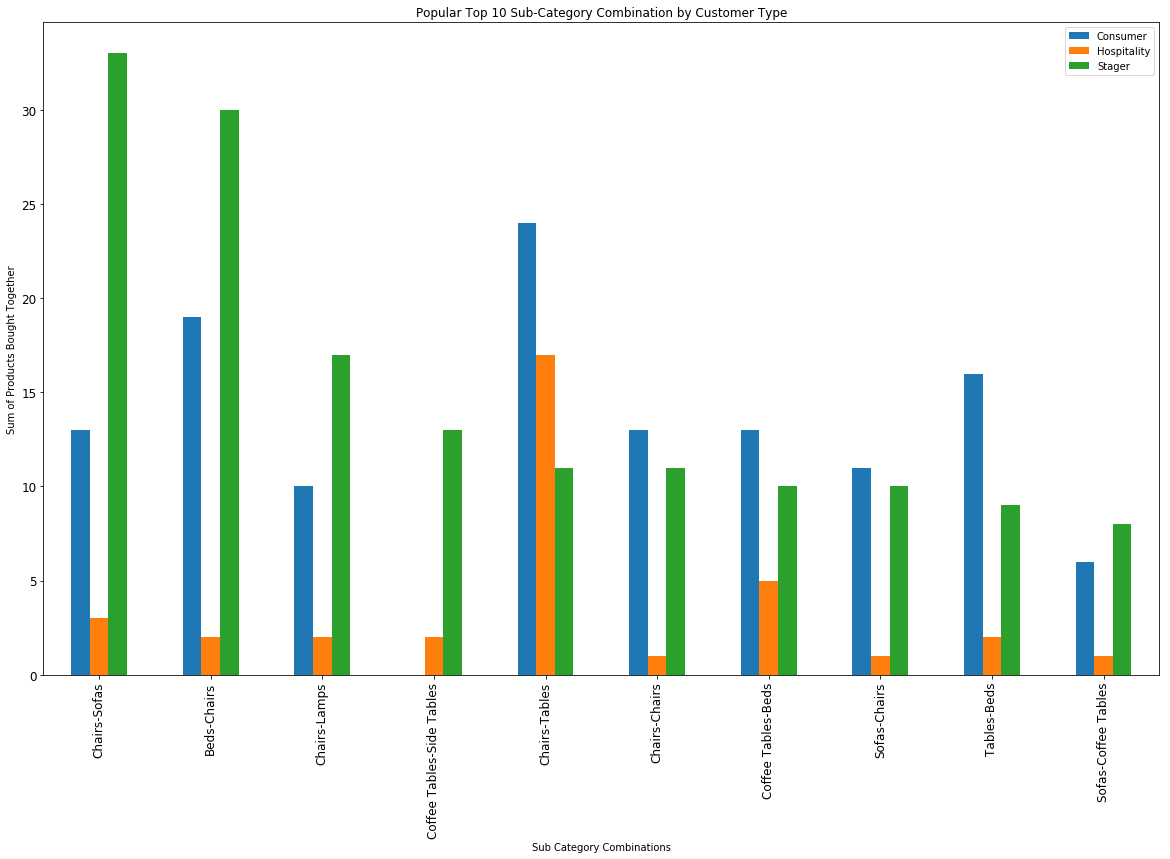

In [5]:
filter_file["category Combo"] = filter_file["Product Category 1"] + "-" +filter_file["Product Category 2"]
chart1 =filter_file.groupby(["category Combo"])["Consumer", "Hospitality", "Stager"].sum().reset_index().sort_values(ascending = False, by = ["Stager","Consumer","Hospitality"]).head(10
)
plot = chart1.plot(kind="bar", legend = True, title = "Popular Top 10 Sub-Category Combination by Customer Type", fontsize = 12, figsize=(20,12))

ls = [i.get_text() for i in plot.get_xticklabels()]

for i in range(len(ls)):
    ls[i] = chart1["category Combo"]
    plot.set_xticklabels(ls[i])

plot.set_ylabel("Sum of Products Bought Together")
plot.set_xlabel("Sub Category Combinations")


In [6]:

#x=chart1["category Combo"].values
#x_pos = np.arange(len(x))

#y = chart1['Consumer'].values
#y1= chart1['Hospitality'].values
#y2 = chart1['Stager'].values
#color = ["green","red","yellow","cyan","orange","blue","violet","pink"]
#axis, figure = plt.subplots()
#plt.figure(figsize=(20,10))
#plt.title("Popular Category by Customer Type")
#plt.xticks(x_pos,x)
#plt.ylabel("Count of Product bought Together")
#plot1 = plt.bar(x,y,color= "g", align = "center", label = "Consumer")
#plot2 = plt.bar(x,y1,label = "Hospitality", color = "orange")
#plot3 = plt.bar(x,y2,label = "Stager", color = "skyblue")
#plt.legend()
chart1


,category Combo,Consumer,Hospitality,Stager
7,Chairs-Sofas,13,3,33
0,Beds-Chairs,19,2,30
6,Chairs-Lamps,10,2,17
12,Coffee Tables-Side Tables,0,2,13
9,Chairs-Tables,24,17,11
4,Chairs-Chairs,13,1,11
10,Coffee Tables-Beds,13,5,10
15,Sofas-Chairs,11,1,10
18,Tables-Beds,16,2,9
16,Sofas-Coffee Tables,6,1,8


In [7]:
chart1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 7 to 16
Data columns (total 4 columns):
category Combo    10 non-null object
Consumer          10 non-null int64
Hospitality       10 non-null int64
Stager            10 non-null int64
dtypes: int64(3), object(1)
memory usage: 400.0+ bytes


In [8]:
chart1.corr()

,Consumer,Hospitality,Stager
Consumer,1.000000,0.628739,0.202139
Hospitality,0.628739,1.000000,-0.112745
Stager,0.202139,-0.112745,1.000000


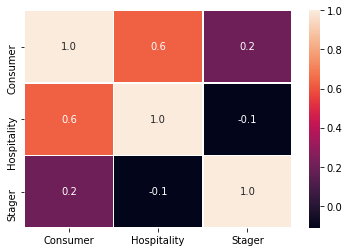

In [13]:
fig, ax = plt.subplots()
sns.heatmap(chart1.corr(), annot = True, fmt=".1f",ax=ax, linewidths=.5)

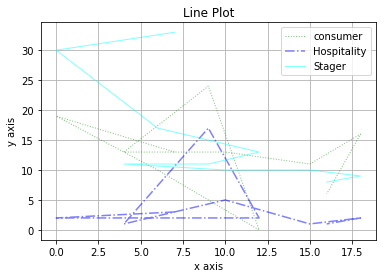

In [27]:
chart1.Consumer.plot(kind ="line", color = "g", label = "consumer", grid = True, linewidth = 1, linestyle =":", alpha = 0.5)
chart1.Hospitality.plot(kind = "line", color = "blue", label = "Hospitality", grid = True, linestyle = "-.",alpha = 0.5)
chart1.Stager.plot(kind = "line", color = "cyan", label = "Stager", grid = True, linestyle = "-", alpha = 0.5, linewidth = 1)
plt.legend()
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Plot")
plt.show()

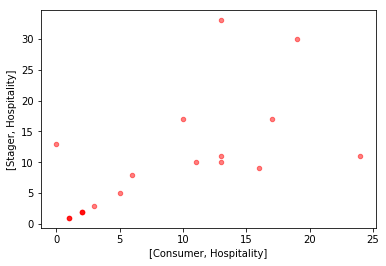

In [38]:
chart1.plot(kind = "scatter", x = ['Consumer',"Hospitality"], y = ["Stager", "Hospitality"], color = "red", alpha = 0.5)


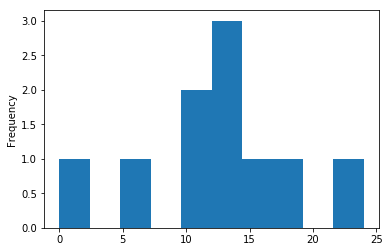

In [42]:
chart1.Consumer.plot(kind="hist", bins = 10)

In [ ]:
dictionary = {"Spain":'Madrid', "USA": 'Vegas'}
